In [39]:
import pandas as pd
from IPython.display import display

# reading the specific sheets selected from the excel document
sheets_to_read = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']
dfs = pd.read_excel('data/riket2023_åk9_np.xlsx', sheet_name=sheets_to_read, header=8)

# Changing name of the columns
for sheet_name, df in dfs.items():
    df.columns = [col.replace('Typ av huvudman', 'Huvudman') 
                       .replace('Totalt', 'Totalt (A-F)')
                       .replace('Flickor', 'Flickor (A-F)')
                       .replace('Pojkar', 'Pojkar (A-F)') for col in df.columns]

# Pritning out the dataframes
for sheet_name, df in dfs.items():
    print(f"\nData from {sheet_name}:")
    display(df.head())



Data from Engelska:


,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2



Data from Matematik:


,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7



Data from Svenska:


,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F)
0,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
1,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
2,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
3,Riket,Skolverket,40,19,21,100.0,100.0,100.0,15.0,15.9,14.2



Data from Svenska som andraspråk:


,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-F),Flickor (A-F),Pojkar (A-F)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
3,Riket,Skolverket,..,..,..,..,..,..,..,..,..


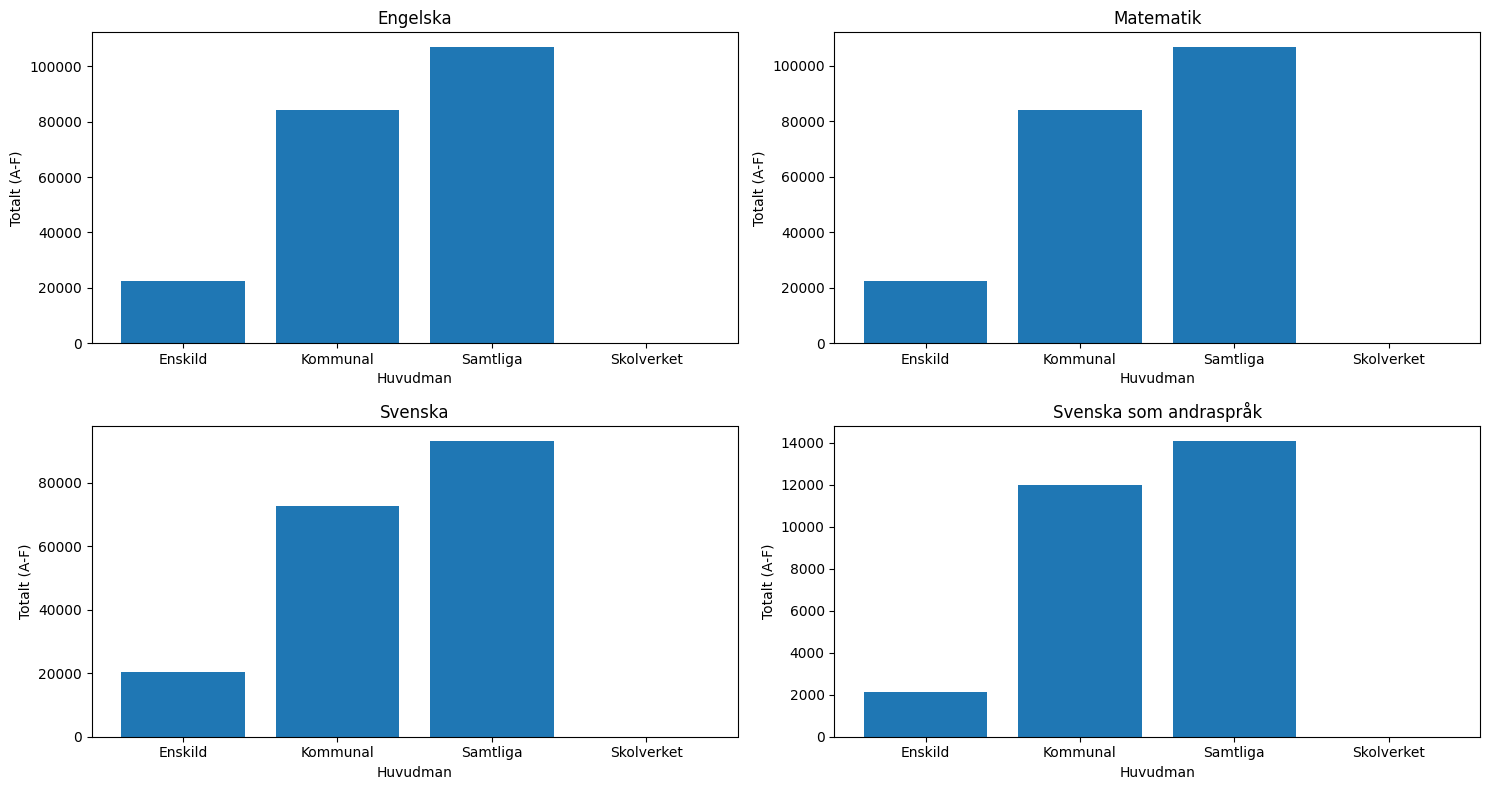

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Skapar en figur med 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()

# Ritar några exempelstaplar i varje subplot
for i, (sheet_name, df) in enumerate(dfs.items()):
    ax = axes[i]  # Hämta rätt subplot
    
    df["Totalt (A-F)"] = pd.to_numeric(df["Totalt (A-F)"], errors='coerce')
    
    grouped_data = df.groupby('Huvudman')['Totalt (A-F)'].sum()  # Gruppera och summera poängen
    
    ax.bar(grouped_data.index, grouped_data.values)  # Rita stapeldiagram
    ax.set_title(sheet_name)  # Sätt titel med ämnets namn
    ax.set_xlabel("Huvudman")  
    ax.set_ylabel("Totalt (A-F)")  

plt.tight_layout()
plt.show()
